## Setup

In [31]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import seaborn as sns

In [2]:
%load_ext google.cloud.bigquery

ModuleNotFoundError: No module named 'google.cloud'

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 15 years ago. So if today is 2024.05.17 then the weather we want to forecast is for the date 2009.05.18. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

In [ ]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


## load dataset and use it as dummy to code the tasks below

In [4]:
df = pd.read_csv('coding_challenge.csv')
df.head()

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder
0,2006-01-24,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.0,1.20,False,False,False,False
1,2006-01-25,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.0,1.20,False,False,False,False
2,2006-01-26,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.0,2.66,False,False,False,False
3,2006-01-27,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.0,2.66,False,False,False,False
4,2006-01-28,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.0,2.66,False,False,False,False


In [5]:
df['station_number'].unique()

array([725300, 725330, 725315, 725314, 725326, 725327, 725317, 725305,
       725320, 725316])

## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [10]:
# change data to 'YYYY-MM-DD' format
df['date'] = pd.to_datetime(df['date'],unit='D')

ValueError: non convertible value 2006-01-24 with the unit 'D'

In [11]:
# select the data from 2005 till 2009
short_df = df[(df['date'] >= '2005-01-01') & (df['date'] <= '2009-12-31')]
short_df.head(-1)

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder
0,2006-01-24,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.00,1.20,False,False,False,False
1,2006-01-25,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.00,1.20,False,False,False,False
2,2006-01-26,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.00,2.66,False,False,False,False
3,2006-01-27,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.00,2.66,False,False,False,False
4,2006-01-28,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.00,2.66,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15220,2009-12-26,725316,25.700001,17.000000,1006.799988,8.1,16.1,21.200001,0.01,0.00,False,False,False,False
15221,2009-12-27,725316,23.100000,18.700001,1012.900024,5.1,9.8,18.000000,0.00,0.00,True,True,True,True
15222,2009-12-28,725316,24.500000,17.700001,1019.599976,9.9,13.1,19.000000,0.07,0.00,False,False,False,False
15223,2009-12-29,725316,17.200001,12.200000,1031.000000,8.9,4.6,7.000000,0.00,0.00,False,False,False,False


In [12]:
 # station numbers including and between 725300 and 726300
filtered_df = short_df[(short_df['station_number'] >= 725300) & (short_df['station_number'] <= 726300)]
filtered_df.head(-1)

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder
0,2006-01-24,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.00,1.20,False,False,False,False
1,2006-01-25,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.00,1.20,False,False,False,False
2,2006-01-26,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.00,2.66,False,False,False,False
3,2006-01-27,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.00,2.66,False,False,False,False
4,2006-01-28,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.00,2.66,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15220,2009-12-26,725316,25.700001,17.000000,1006.799988,8.1,16.1,21.200001,0.01,0.00,False,False,False,False
15221,2009-12-27,725316,23.100000,18.700001,1012.900024,5.1,9.8,18.000000,0.00,0.00,True,True,True,True
15222,2009-12-28,725316,24.500000,17.700001,1019.599976,9.9,13.1,19.000000,0.07,0.00,False,False,False,False
15223,2009-12-29,725316,17.200001,12.200000,1031.000000,8.9,4.6,7.000000,0.00,0.00,False,False,False,False


### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [14]:
re_filtered_df = filtered_df[(filtered_df['station_number'] <= 725300)]
re_filtered_df.head(-1)

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder
0,2006-01-24,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.00,1.20,False,False,False,False
1,2006-01-25,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.00,1.20,False,False,False,False
2,2006-01-26,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.00,2.66,False,False,False,False
3,2006-01-27,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.00,2.66,False,False,False,False
4,2006-01-28,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.00,2.66,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,2009-12-26,725300,23.299999,18.600000,1006.299988,3.2,11.3,19.400000,0.11,5.10,False,False,False,False
1429,2009-12-27,725300,20.299999,16.600000,1010.099976,5.7,7.0,17.100000,0.05,3.10,False,False,False,False
1430,2009-12-28,725300,22.799999,17.100000,1015.000000,9.1,11.7,14.000000,0.01,2.00,False,False,False,False
1431,2009-12-29,725300,17.100000,8.000000,1029.599976,10.0,5.7,8.100000,0.00,2.00,False,False,False,False


In [15]:
# remove stations that don't have information from 2005 till 2009
has_info = re_filtered_df['station_number'].unique()
df_with_info = re_filtered_df[re_filtered_df['station_number'].isin(has_info)]
df_with_info.head()

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder
0,2006-01-24,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.0,1.20,False,False,False,False
1,2006-01-25,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.0,1.20,False,False,False,False
2,2006-01-26,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.0,2.66,False,False,False,False
3,2006-01-27,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.0,2.66,False,False,False,False
4,2006-01-28,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.0,2.66,False,False,False,False


Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

In [16]:
# check and count any missing values values
df_with_info.isna().sum()

date                      0
station_number            0
mean_temp                 0
mean_dew_point            0
mean_sealevel_pressure    0
mean_visibility           0
mean_wind_speed           0
max_temperature           0
total_precipitation       0
snow_depth                0
fog                       0
snow                      0
hail                      0
thunder                   0
dtype: int64

In [17]:
# functions to convert date
def year2num(date_str):
    year = int(date_str[0:4])
    return year

def month2num(date_str):
    month = int(date_str[5:7])
    return month

def day2num(date_str):
    day = int(date_str[8:10]) 
    return day

In [18]:
 # convert date string to numerical features for classification 
df_with_info['year'] = df_with_info['date'].apply(year2num)
df_with_info['month'] = df_with_info['date'].apply(month2num)
df_with_info['day'] = df_with_info['date'].apply(day2num)

In [19]:
# plot descriptive statistics
df_with_info.describe()

,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,year,month,day
count,1434.0,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,725300.0,50.782078,39.312762,1016.499442,8.980056,8.247908,41.114296,0.121450,1.267912,2007.524407,6.613668,15.785216
std,0.0,19.662879,18.513724,7.055709,1.634146,3.213301,18.890927,0.319141,1.736634,1.111899,3.401487,8.821952
min,725300.0,-9.700000,-18.900000,985.900024,1.100000,2.000000,-18.000000,0.000000,0.000000,2006.000000,1.000000,1.000000
25%,725300.0,35.124999,25.600000,1012.124985,8.600000,5.825000,27.100000,0.000000,0.000000,2007.000000,4.000000,8.000000
50%,725300.0,52.099998,40.799999,1016.299988,9.800000,7.800000,42.099998,0.000000,0.000000,2008.000000,7.000000,16.000000
75%,725300.0,68.199997,54.975000,1020.799988,10.000000,10.100000,57.150001,0.080000,2.000000,2009.000000,10.000000,23.000000
max,725300.0,89.000000,73.699997,1039.900024,10.000000,20.200001,80.099998,3.910000,9.800000,2009.000000,12.000000,31.000000


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [20]:
import datetime as dt

today = str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]
today

'2009-06-29'

In [21]:
df_with_info = pd.read_csv('coding_challenge.csv')

get the number of datapoints where snow=true vs snow=false. This will give us an overview over how balanced or unbalanced
our dataset is and which evaluation metric to use

In [22]:
snow = df_with_info['snow'].sum()
no_snow = (df_with_info['snow'] == False).sum()
print('snow: ', snow)
print('no snow: ', no_snow)
print(f'{(snow/no_snow)*100:.0f}% positive classes')

snow:  1413
no snow:  13919
10% positive classes


There is much more often no snow than snow. Therefore, we should later on look at precision, recall and f1-score and find an
appropriate threshold to detect snow. This will most likely have to be lower than 0.5

In [23]:
# test set: today
test_set = df_with_info[df_with_info['date'] == today]

# since our data is sequential, we will from here only use the data before today
remaining_data = df_with_info[df_with_info['date'] < today]

# use 80% of the remainin data for the test set
train_size = int(len(remaining_data) * 0.8)

# split the remaining data into training and evaluation sets
train_set = remaining_data.iloc[:train_size]
evaluation_set = remaining_data.iloc[train_size:]

# Display the resulting sets
print("Train Set")
print(train_set)

print("\nEvaluation Set")
print(evaluation_set)

print("\nTest Set")
print(test_set)

Train Set
             date  station_number  mean_temp  mean_dew_point  \
0      2006-01-24          725300  33.200001       26.799999   
1      2006-01-25          725300  33.299999       21.400000   
2      2006-01-26          725300  30.299999       19.700001   
3      2006-01-27          725300  39.900002       25.299999   
4      2006-01-28          725300  43.200001       33.799999   
...           ...             ...        ...             ...   
12256  2006-02-01          725320  41.000000       32.299999   
12257  2006-02-02          725320  36.599998       31.400000   
12258  2006-02-03          725320  38.700001       34.700001   
12259  2006-02-04          725320  26.900000       19.600000   
12260  2006-02-05          725320  22.900000       14.100000   

       mean_sealevel_pressure  mean_visibility  mean_wind_speed  \
0                 1008.500000              7.0             15.2   
1                 1021.099976             10.0             14.0   
2                 10

In [24]:
# (1) separate features (X) and target (y) and remove string column (date)
# (2) remove string column (date)
# (3) remove snow_depth variable because it could be data leakage (low snow_depth = lower likelihood of snow)

X_train = train_set.drop(['snow','date','snow_depth'], axis=1)
y_train = train_set['snow']

X_eval = evaluation_set.drop(['snow','date','snow_depth'], axis=1)
y_eval = evaluation_set['snow']

X_test = test_set.drop(['snow','date','snow_depth'], axis=1)
y_test = test_set['snow']

In [25]:
# check if dimensions are correct and match
print('training data: ', X_train.shape)
print('training labels: ', y_train.shape)

print('evaluation data: ', X_eval.shape)
print('evaluation labels: ', y_eval.shape)

print('test data: ', X_test.shape)
print('test labels: ', y_test.shape)

training data:  (9947, 11)
training labels:  (9947,)
evaluation data:  (2487, 11)
evaluation labels:  (2487,)
test data:  (9, 11)
test labels:  (9,)


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [26]:
import datetime as dt

today = str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]
today

'2009-06-29'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [29]:
# this is a classification task. start by using simple logistic regression as baseline model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train, y_train)

# get predictions
y_eval_pred = logreg.predict(X_eval)

# get probabilities
y_eval_prob = logreg.predict_proba(X_eval)[:, 1]

# get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_eval, y_eval_prob)

# Calculate F1-score for each threshold
f1_scores = []
for threshold in thresholds:
    y_eval_pred_threshold = (y_eval_prob >= threshold).astype(int)
    f1_scores.append(f1_score(y_eval, y_eval_pred_threshold))

# Find the threshold that gives the maximum F1-score
best_threshold_index = f1_scores.index(max(f1_scores))
best_threshold = thresholds[best_threshold_index]
best_f1 = f1_scores[best_threshold_index]

print(f'The best threshold is {best_threshold:.2f}')
print(f'The best F1-score is {best_f1:.2f}', best_f1)

# calculate area under the curve
AUC = auc(recall, precision)

print(f'The area under the curve is {AUC:.2f}')

The best threshold is 0.68
The best F1-score is 0.50 0.5008576329331046
The area under the curve is 0.53


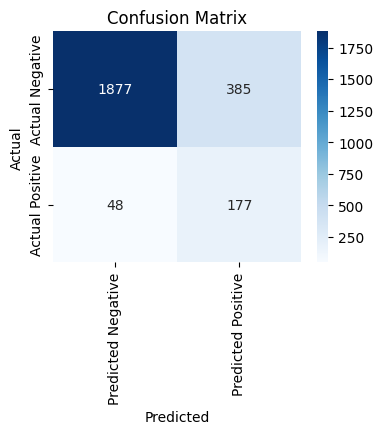

In [33]:
conf_matrix = confusion_matrix(y_eval, y_eval_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

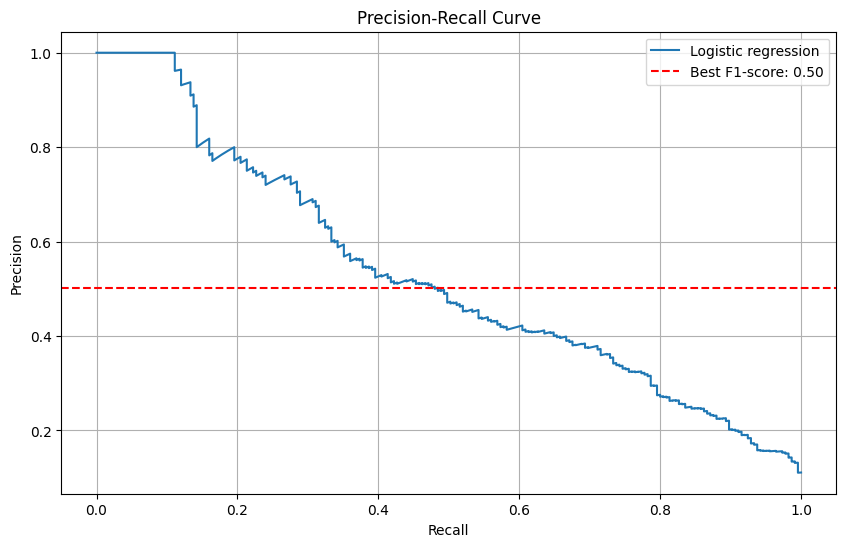

In [35]:
# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Logistic regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.axhline(y=best_f1, color='r', linestyle='--', label=f'Best F1-score: {best_f1:.2f}')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The F1-score on the test set is 0.00
The area under the curve on the test set is nan


/Users/monika/opt/anaconda3/envs/dsr-b34/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/monika/opt/anaconda3/envs/dsr-b34/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]


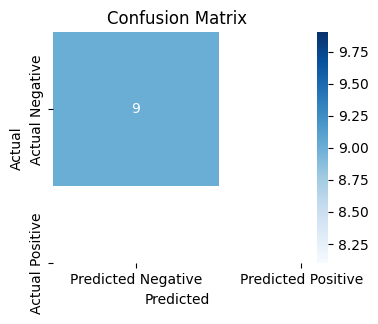

In [36]:
# evaluate final model on test set
y_test_prob = logreg.predict_proba(X_test)[:, 1]

# Apply the best threshold
y_test_pred = (y_test_prob >= best_threshold).astype(int)

# Step 4: Evaluate the model performance on the test set
# Calculate F1-score for the test set
test_f1 = f1_score(y_test, y_test_pred)
print(f'The F1-score on the test set is {test_f1:.2f}')

# Calculate precision, recall, and AUC for the test set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob)
test_auc = auc(recall_test, precision_test)
print(f'The area under the curve on the test set is {test_auc:.2f}')

# confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Since there are no positive classes on the day of the test data, the f1-score is undefined. But the raw data shows that 

In [ ]:
# grid search over different models and parameters
# compare it to baseline model

In [ ]:
# plot actual data and predictions
def plot_actual_vs_predictions(time, actual, predicted, title='Actual vs Predicted'):
    plt.figure(figsize=(15, 6))
    plt.plot(time, actual, label='Actual', alpha=0.7, marker='o')
    plt.plot(time, predicted, label='Predicted', alpha=0.7, marker='x')
    plt.xlabel('Time')
    plt.ylabel('Class')
    plt.title(title)
    plt.legend()
    plt.show()